# Introduction


---


**The FVC2002 fingerprint dataset is a fingerprint verification competition dataset which was organized back in 2000 and then again in 2002. This dataset consists of four different sensor fingerprints which are low cost optical sensors, low cost capacitive sensor and optical sensor , and modular generator, each sensor has different image sizes**.

**With this data, I can perform many processing operations on it, in addition to many techniques in order to obtain different results according to the need.**

**But in order not to be late or too long, I will focus on issuing a series of codes in the same data set. Each code performs a different purpose / goal, and therefore we will apply many techniques to it.**

**In addition to the periodic maintenance of the first code in order to link the series of codes together, and to inform the reader of what is new in that series.**

**In the first code, I will focus on a specific goal, which is to use that data in the application of Autoencoder technology, and as we know that technology can perform many tasks according to the priority of the project, and therefore I will focus on one task that we can perform on the data at the present time, which is to rebuild the image, certainly many Developers prefer Generative Adversarial Networks (GANs) in their image reconstruction process, but it's okay to see what Autoencoder can do at that point.**

**You can do a simple research on the principle of work of the Autoencoder and you will learn a lot, because here I will not focus on explaining the principle of work more than the techniques, but it is okay to explain some points while I work and also so as not to get bored.**

**I wish you a good code, let's get down to business!**

# Reconstruction of fingerprint images using Autoencoder algorithm

![Fingerprints](https://images.fineartamerica.com/images-medium-large-5/1-fingerprint-recognition-coneyl-jayscience-photo-library.jpg)

#  Importing libraries

In [2]:
from glob import glob
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

# Importing data

In [3]:
data_image = glob('../input/fvc2002-fingerprints/fingerprints/DB*/*')
images = []
from matplotlib.pyplot import imread

def readImages(data_image):
    for i in range(len(data_image)):
        img = cv2.imread(data_image[i])
        img = cv2.resize(img,(224,224))
        images.append(img)
        
    return images

In [4]:
images = readImages(data_image)

# Show some data

In [5]:
pip install ipyplot

Note: you may need to restart the kernel to use updated packages.


In [6]:
import ipyplot
import pydicom
from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter


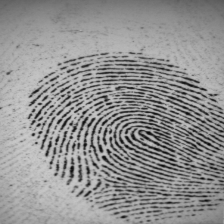
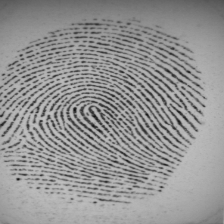
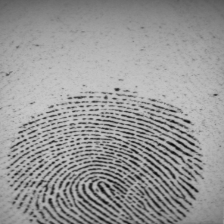
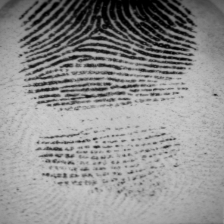
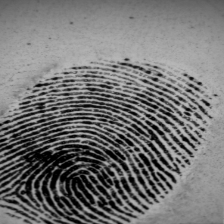


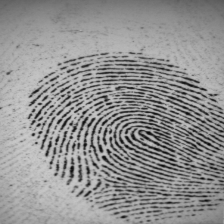
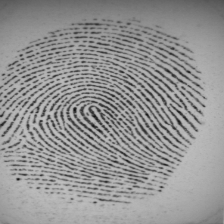
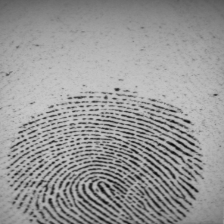
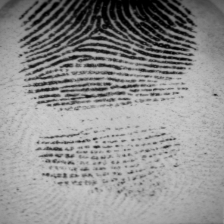
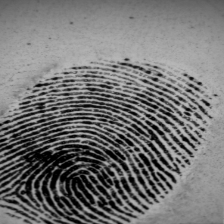

In [7]:
ipyplot.plot_images(images, max_images=5, img_width=150)

**The pictures look not good, but that's okay now because I'm going to do some things in addition to explaining the original code.**

In [8]:
# Convert the data type to float32 array so that it is easy to perform operations on it.
images_arr = np.asarray(images)
images_arr = images_arr.astype('float32')
images_arr.shape

(320, 224, 224, 3)

# Manipulating images and trying to improve

In [9]:
def crop_image_from_gray(img,tol=7):
    """
    Crop out black borders
    the referance(you can find the total code here)
    https://www.kaggle.com/ratthachat/aptos-updated-preprocessing-ben-s-cropping
    """  
    
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        mask = gray_img>tol        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0):
            return img
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img


def circle_crop(img):   
    """
    Create circular crop around image centre    
    """    
    
    img = cv2.imread(img)
    img = crop_image_from_gray(img)    
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    
    return img 

def circle_crop_v2(img):
    """
    Create circular crop around image centre
    """
    img = cv2.imread(img)
    img = crop_image_from_gray(img)

    height, width, depth = img.shape
    largest_side = np.max((height, width))
    img = cv2.resize(img, (largest_side, largest_side))

    height, width, depth = img.shape

    x = int(width / 2)
    y = int(height / 2)
    r = np.amin((x, y))

    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x, y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)

    return img

(-0.5, 387.5, 373.5, -0.5)

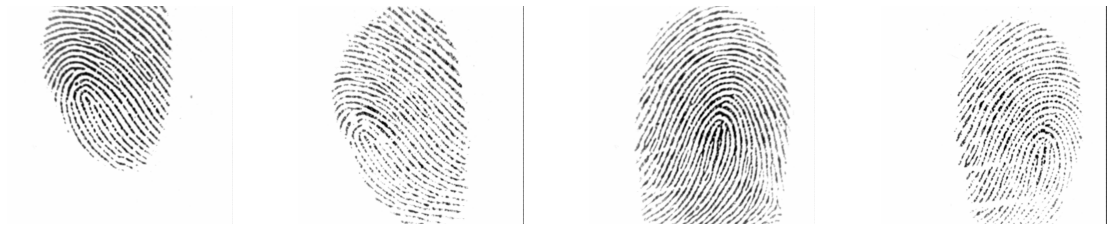

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,4))

spaceboy = cv2.imread('../input/fvc2002-fingerprints/fingerprints/DB1_B/101_2.tif')
ax[0].imshow(cv2.cvtColor(spaceboy, cv2.COLOR_BGR2RGB))
ax[0].axis('off')

cropboy = cv2.imread('../input/fvc2002-fingerprints/fingerprints/DB1_B/101_8.tif')
ax[1].imshow(cv2.cvtColor(cropboy, cv2.COLOR_BGR2RGB))
ax[1].axis('off')

squareboy = cv2.imread('../input/fvc2002-fingerprints/fingerprints/DB1_B/102_2.tif')
ax[2].imshow(cv2.cvtColor(squareboy, cv2.COLOR_BGR2RGB))
ax[2].axis('off')

supercropboy = cv2.imread('../input/fvc2002-fingerprints/fingerprints/DB1_B/102_8.tif')
ax[3].imshow(cv2.cvtColor(supercropboy, cv2.COLOR_BGR2RGB))
ax[3].axis('off')

(-0.5, 374.5, 373.5, -0.5)

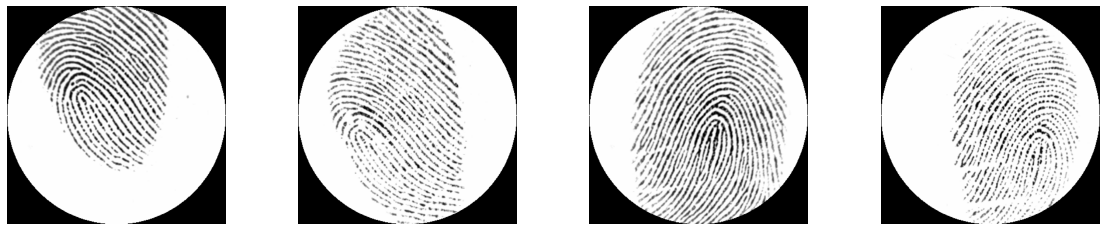

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,4))

spaceboy = circle_crop('../input/fvc2002-fingerprints/fingerprints/DB1_B/101_2.tif')
ax[0].imshow(cv2.cvtColor(spaceboy, cv2.COLOR_BGR2RGB))
ax[0].axis('off')

cropboy = circle_crop('../input/fvc2002-fingerprints/fingerprints/DB1_B/101_8.tif')
ax[1].imshow(cv2.cvtColor(cropboy, cv2.COLOR_BGR2RGB))
ax[1].axis('off')

squareboy = circle_crop('../input/fvc2002-fingerprints/fingerprints/DB1_B/102_2.tif')
ax[2].imshow(cv2.cvtColor(squareboy, cv2.COLOR_BGR2RGB))
ax[2].axis('off')

supercropboy = circle_crop('../input/fvc2002-fingerprints/fingerprints/DB1_B/102_8.tif')
ax[3].imshow(cv2.cvtColor(supercropboy, cv2.COLOR_BGR2RGB))
ax[3].axis('off')

# Useing some filters to monitor improvement

In [12]:
def masc_gaus_2d(sigma, n):
    width = n//2
    dx = 1
    dy = 1
    x = np.arange(-width, width)
    y = np.arange(-width, width)
    x2d, y2d = np.meshgrid(x, y)
    kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2)
    
    return kernel_2d

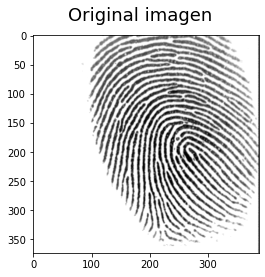

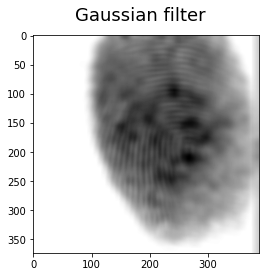

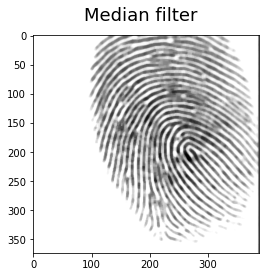

In [13]:
image = cv2.imread("../input/fvc2002-fingerprints/fingerprints/DB1_B/101_7.tif", 0)
fig = plt.figure()
fig.suptitle('Original imagen', fontsize=18)
plt.imshow(image, plt.cm.gray)

kernel = masc_gaus_2d(sigma = 7, n = 25)
img_convolved = convolve(image, kernel)
fig = plt.figure()
fig.suptitle('Gaussian filter', fontsize=18)
plt.imshow(img_convolved,plt.cm.gray)

fig = plt.figure()
fig.suptitle('Median filter', fontsize=18)
plt.imshow(cv2.medianBlur(image,7),plt.cm.gray)

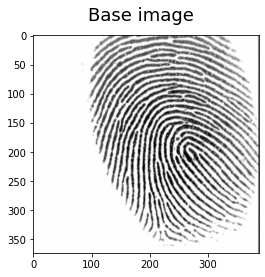

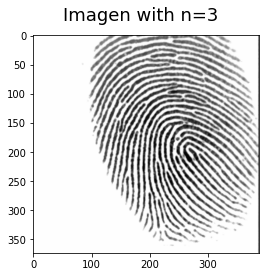

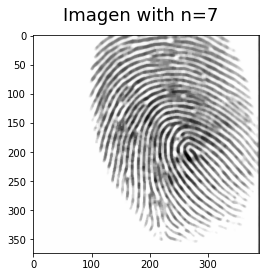

In [14]:
image = cv2.imread("../input/fvc2002-fingerprints/fingerprints/DB1_B/101_7.tif")
fig = plt.figure()
fig.suptitle('Base image', fontsize=18)
plt.imshow(image)

fig = plt.figure()
fig.suptitle('Imagen with n=3', fontsize=18)
plt.imshow(cv2.medianBlur(image,3))

fig = plt.figure()
fig.suptitle('Imagen with n=7', fontsize=18)
plt.imshow(cv2.medianBlur(image,7))

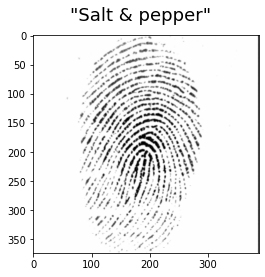

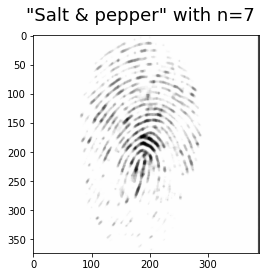

In [15]:
image = cv2.imread("../input/fvc2002-fingerprints/fingerprints/DB1_B/102_7.tif")

fig = plt.figure()
fig.suptitle('"Salt & pepper"', fontsize=18)
plt.imshow(image)

fig = plt.figure()
fig.suptitle('"Salt & pepper" with n=7', fontsize=18)
plt.imshow(cv2.medianBlur(image,7))

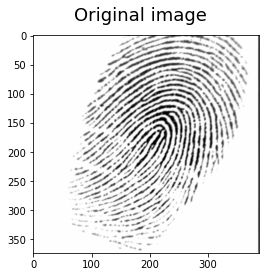

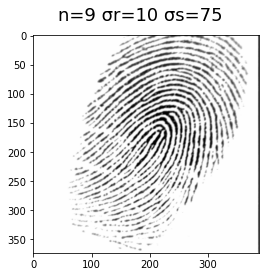

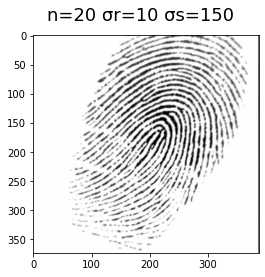

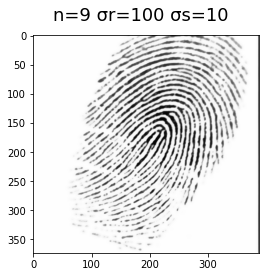

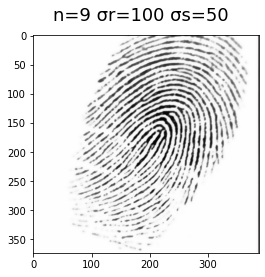

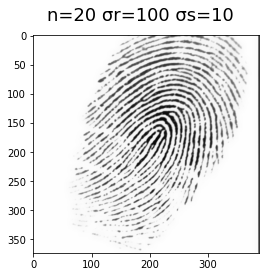

In [16]:
image = cv2.imread("../input/fvc2002-fingerprints/fingerprints/DB1_B/102_4.tif")

fig = plt.figure()
fig.suptitle('Original image', fontsize=18)
plt.imshow(image)

fig = plt.figure()
fig.suptitle('n=9 σr=10 σs=75', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,9,10,75))

fig = plt.figure()
fig.suptitle('n=20 σr=10 σs=150', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,20,10,150))

fig = plt.figure()
fig.suptitle('n=9 σr=100 σs=10', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,9,100,10))

fig = plt.figure()
fig.suptitle('n=9 σr=100 σs=50', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,9,100,50))

fig = plt.figure()
fig.suptitle('n=20 σr=100 σs=10', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,20,100,10))

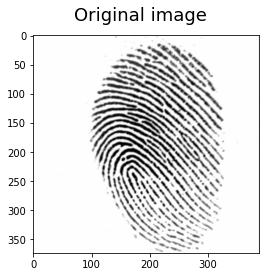

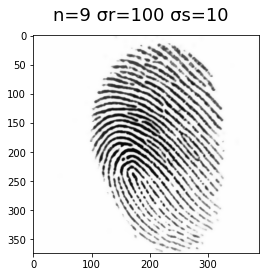

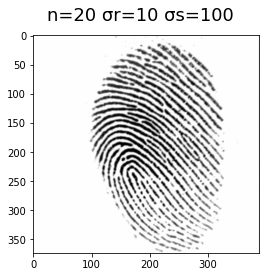

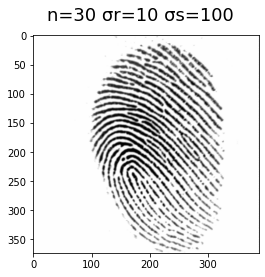

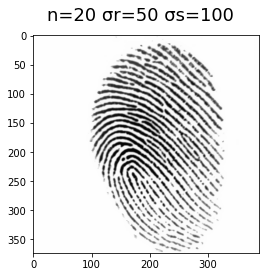

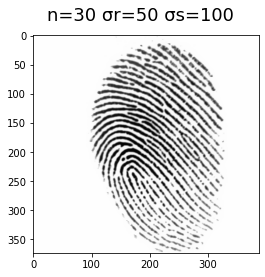

In [17]:
image = cv2.imread("../input/fvc2002-fingerprints/fingerprints/DB1_B/101_1.tif")
fig = plt.figure()
fig.suptitle('Original image', fontsize=18)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=9 σr=100 σs=10', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,9,100,10), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=20 σr=10 σs=100', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,20,10,100), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=30 σr=10 σs=100', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,30,10,100), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=20 σr=50 σs=100', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,20,50,100), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=30 σr=50 σs=100', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,30,50,100), cv2.COLOR_BGR2RGB))

**After using many filters on the data, we see that the original images are the best that we can get, through the simple processing that we followed in the data, maybe if we process the data in a different / other way, maybe we can get better results, but it's okay, we can in code Finally, we follow a different approach.**

**Let's convert images to grayscale so that it is easy to manipulate.**

In [18]:
images_arr = images_arr.reshape(-1, 224,224, 1)
images_arr.shape

(960, 224, 224, 1)

In [19]:
print('Max value ',np.max(images_arr))
print('Min value ',np.min(images_arr))

Max value  255.0
Min value  0.0


In [20]:
images_arr = images_arr / np.max(images_arr)
images_arr.shape

(960, 224, 224, 1)

# Data splitting

In [84]:
train_X,valid_X,train_ground,valid_ground = train_test_split(images_arr,images_arr,test_size=0.1,random_state=44)

In [85]:
print('shape of train_X        :' , train_X.shape)
print('shape of valid_X        :' , valid_X.shape)
print('shape of train_ground   :' , train_ground.shape)
print('shape of valid_ground   :' , valid_ground.shape)

shape of train_X        : (864, 224, 224, 1)
shape of valid_X        : (96, 224, 224, 1)
shape of train_ground   : (864, 224, 224, 1)
shape of valid_ground   : (96, 224, 224, 1)


**Important note: I did not prepare the labels and I will not use them here, because the nature of the application does not require that, and therefore I skipped it.**

# Add noise to the data

**This is if we want to test the Autoencoders in removing / eliminating noise from images.**

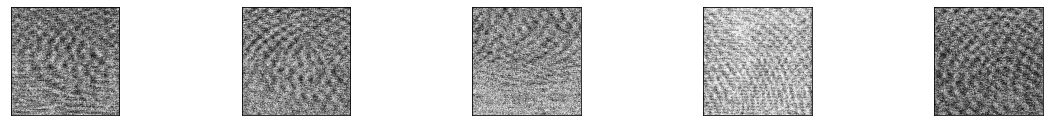

In [87]:
noise_factor = 0.3
x_train_noisy = train_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_X.shape) 
valid_X_noisy = valid_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=valid_X.shape) 
train_ground_noisy = train_ground + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_ground.shape) 
valid_ground_noisy = valid_ground + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=valid_ground.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
valid_X_noisy = np.clip(valid_X_noisy, 0., 1.)
train_ground_noisy = np.clip(train_ground_noisy, 0., 1.)
valid_ground_noisy = np.clip(valid_ground_noisy, 0., 1.)
# Here is how the noisy images look right now.
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_train_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

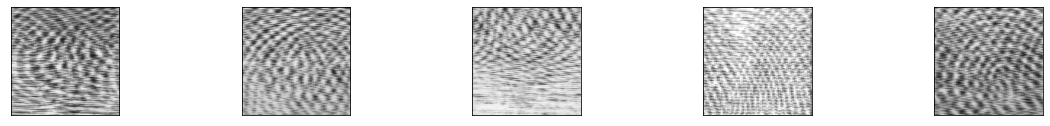

In [113]:
# Original images without noise
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(train_X[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Code Implementation of Autoencoders 

**An autoencoder is actually an Artificial Neural Network that is used to decompress and compress the input data provided in an unsupervised manner. Decompression and compression operations are lossy and data-specific.**

**Autoencoders are a neural network architecture that attempts to find a compressed representation of the given input data.**

![Autoencoders image](https://lh4.googleusercontent.com/wUjH7L2Roehxgaan3TWeemEoUIXMeK7A1Zx_x_UHkAsesLyVcqOpka2YXK-sBkgAzJ61dvseRD-HDrpBindbXIB2XaDR_htXrwzFqtdTBQrcheJkMupCEh3Jo63iR1P69gm2D0P-)

**There are three popular types of Autoencoders:**

* **Simple autoencoder.**

* **Deep CNN autoencoder.**

* **Denoising autoencoder.**

> **I will test each of these types and record the results.**


# Deep CNN Autoencoders

In [88]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import RMSprop

In [148]:
# Here, the network parameters are initially set.
image_size=train_X.shape[1]
# Dimensions of the internal image to the network
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
latent_dim = 16

# The first part of the Autoencoder is the Encoder

In [149]:
# encoder/decoder number of CNN layers and filters per layer
layer_filters = [32, 64]

In [150]:
# first build the encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
# stack of Conv2D(32)-Conv2D(64)
for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               strides=2,
               padding='same')(x);

**The output of the shape from the first part will have low dimensions and therefore I will raise its dimensions through these instructions, and it works to pass the dimensions of the variable sent to it to the new variable.**
> shape = K.int_shape(x)

In [151]:
# Dimensions of the output from the first part
x.shape

TensorShape([None, 56, 56, 64])

In [152]:
# pass dimension
shape = K.int_shape(x)

In [153]:
# Dimensions captured
shape

(None, 56, 56, 64)

In [154]:
# generate latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 32)      320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 200704)            0         
_________________________________________________________________
latent_vector (Dense)        (None, 16)                3211280   
Total params: 3,230,096
Trainable params: 3,230,096
Non-trainable params: 0
_________________________________________________________________


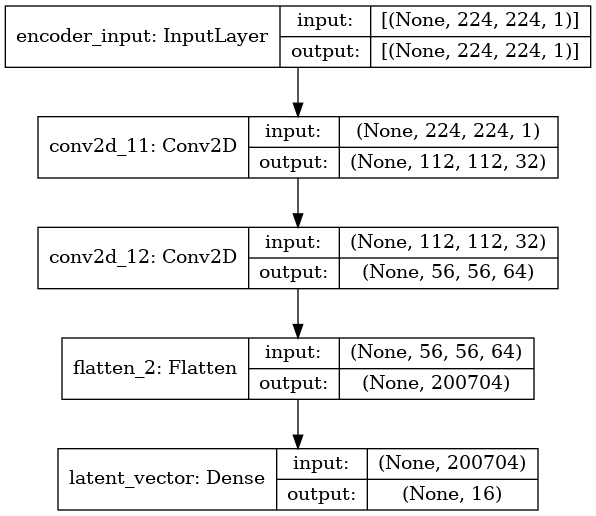

In [155]:
# instantiate encoder model
encoder = Model(inputs, latent, name='encoder')
# Parameter summary for each layer
encoder.summary()
# Sketching the structure of a neural network
plot_model(encoder, to_file='encoder.png', show_shapes=True)

# The second part of the Autoencoder is the Decoder

In [156]:
# build the decoder model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
# use the shape (7, 7, 64) that was earlier saved
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
# from vector to suitable shape for transposed conv
x = Reshape((shape[1], shape[2], shape[3]))(x)

In [157]:
# stack of Conv2DTranspose(64)-Conv2DTranspose(32)
for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        activation='relu',
                        strides=2,
                        padding='same')(x)

In [158]:
# reconstruct the input
outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 16)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 200704)            3411968   
_________________________________________________________________
reshape_2 (Reshape)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 112, 112, 64)      36928     
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 224, 224, 32)      18464     
_________________________________________________________________
decoder_output (Conv2DTransp (None, 224, 224, 1)       289       
Total params: 3,467,649
Trainable params: 3,467,649
Non-trainable params: 0
_________________________________________________

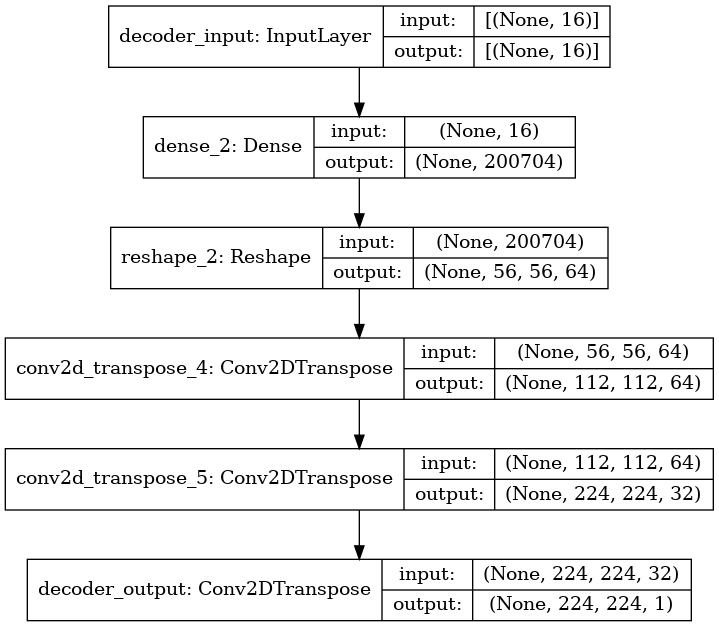

In [159]:
# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='decoder.png', show_shapes=True)

# Connect the parts of the Autoencoder together

> **The binding is through the latent vector.**

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 224, 224, 1)]     0         
_________________________________________________________________
encoder (Functional)         (None, 16)                3230096   
_________________________________________________________________
decoder (Functional)         (None, 224, 224, 1)       3467649   
Total params: 6,697,745
Trainable params: 6,697,745
Non-trainable params: 0
_________________________________________________________________


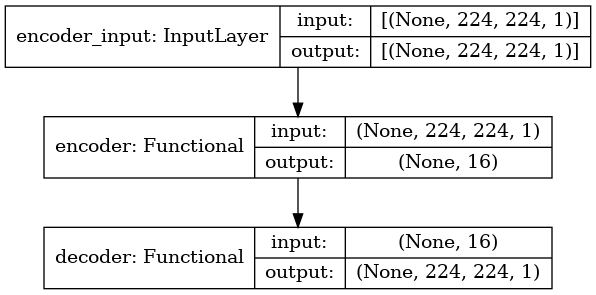

In [160]:
# autoencoder = encoder + decoder
# instantiate autoencoder model
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()
plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True)

In [161]:
# Mean Square Error (MSE) loss function, Adam optimizer
autoencoder.compile(loss = 'binary_crossentropy' , optimizer= 'adam')

# Model Training

In [162]:
# train the autoencoder
history = autoencoder.fit(train_X, 
                          train_ground,
                          epochs=30,
                   validation_data=(valid_X, valid_ground),
                   batch_size=batch_size)

Epoch 1/30
27/27 [==============================] - 2s 67ms/step - loss: 0.6601 - val_loss: 0.6523
Epoch 2/30
27/27 [==============================] - 2s 60ms/step - loss: 0.6177 - val_loss: 0.6199
Epoch 3/30
27/27 [==============================] - 2s 58ms/step - loss: 0.5983 - val_loss: 0.6146
Epoch 4/30
27/27 [==============================] - 2s 60ms/step - loss: 0.5916 - val_loss: 0.6066
Epoch 5/30
27/27 [==============================] - 2s 59ms/step - loss: 0.5843 - val_loss: 0.6014
Epoch 6/30
27/27 [==============================] - 2s 60ms/step - loss: 0.5709 - val_loss: 0.5887
Epoch 7/30
27/27 [==============================] - 2s 60ms/step - loss: 0.5634 - val_loss: 0.5869
Epoch 8/30
27/27 [==============================] - 2s 58ms/step - loss: 0.5604 - val_loss: 0.5840
Epoch 9/30
27/27 [==============================] - 2s 60ms/step - loss: 0.5582 - val_loss: 0.5831
Epoch 10/30
27/27 [==============================] - 2s 60ms/step - loss: 0.5574 - val_loss: 0.5827
Epoch 11/

# saveing the neural network weights

In [163]:
autoencoder.save('Autoencoder neural network_model.h5')

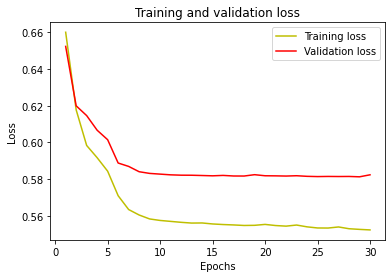

In [164]:
#plot the training and validation accuracy and loss at each epoch
history = history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test Images


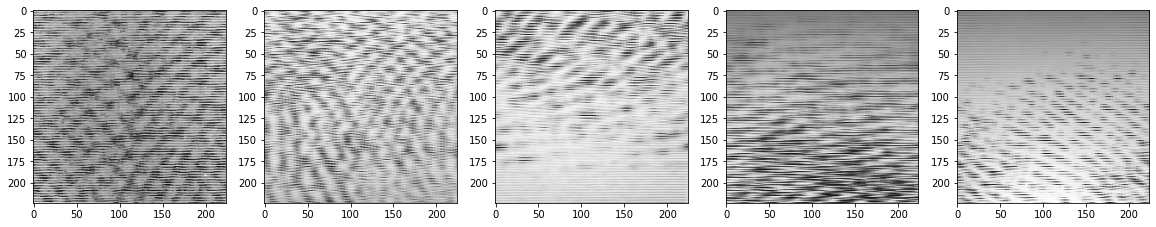

Reconstruction of Test Images


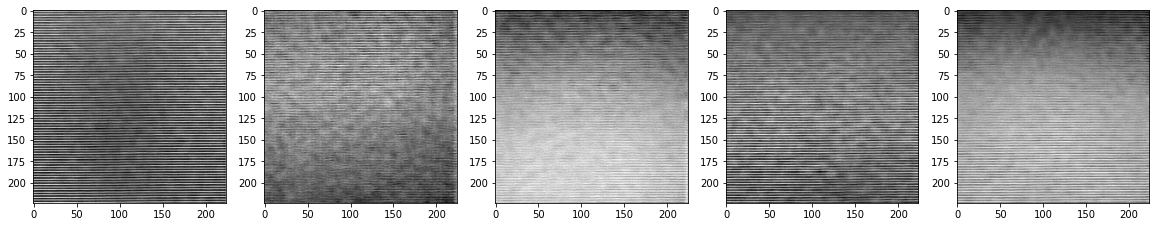

In [165]:
pred = autoencoder.predict(valid_X)#Reconstruction of Test Images
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(valid_ground[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

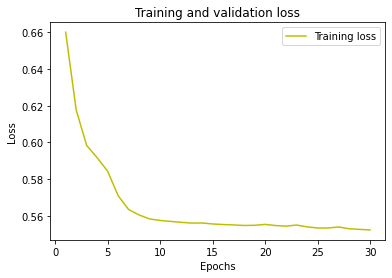

In [166]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

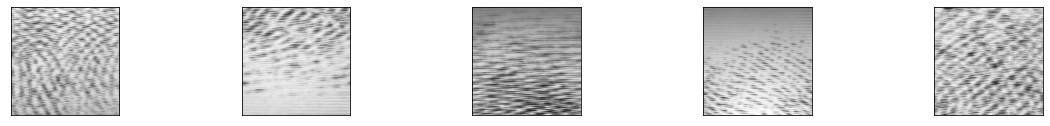

In [167]:
# Once again for clarification
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(valid_X[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

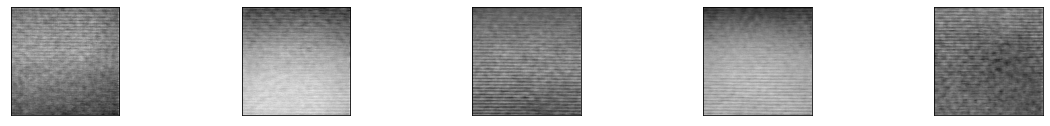

In [168]:
# Once again for clarification
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(pred[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**We notice a convergence in the data, this convergence may not be distinguished from the first sight, but by looking at the original image, we notice that there are some blackness in specific places, and this also we notice in the resulting images, we notice blackness, but at a much lower rate.**

**This convergence process increases when the number of training epochs increases, for example we make their number close to 300, then we can get better results, but this may take some time.**

**Because the number of 30 epochs only is not enough to get good results.**